#              Обучение модели для предсказания исполнителей песен.

- **Описание данных:** 

Настоящий [набор данных](https://stepik.org/media/attachments/course/4852/songs.csv) представляет собой таблицу c 10-ю столбцами и 360 строками в которой предоставленный                        данные по нескольким исполнителям и жанрам музыки.Помимо этого предоствленны даполнительные данные, такие                      как: длинна треков, наименовиние треков, год выпуска, количество знаков препинания.

- **Содержание данных:** 
1) song - название песни
2) year - год создания
4) genre - жанр музыки
5) lyrics - текст песни
6) length - длинна песни
7) commas - запятные в тексте песни 
8) exclamations - восклицания в тексте песни 
9) colons - воеточия в тексте песни 
10) hyphens - дефисы в тексте песни

- **Цель:** 

Обучить модель на тренировочных данных, предсказать авторов песен на тестовых данных. Расчитать precision score на предсказаниях и `y_test`. Если он будет недостаточно высок, потюньем модель.

- **Вывод:**

Разделив наш набор данных на обучающий и тестовый в пропорции `66,7%` и `33,3%` мы успешно обучили модель на тестовых данных с глубиной дерева `max_depth = 2` о чем свидетельствует значения `score`. Для полноты наших убеждений мы так же ответили на вопрос настолько хорошо мы определяем наши классы. `Precision = 1` свидетельствует о том, что мы нашли всех авторов песен и не совершили ошибочных распознований. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns 
%matplotlib inline 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [4]:
from IPython.display import HTML
style = '<style>svg{wethd:50% !important;hight:50% !important}<\style>'
HTML(style)

In [5]:
songs = pd.read_csv('/carpov/songs.csv')

In [36]:
songs.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [76]:
songs.isnull().sum()

song            0
year            0
artist          0
genre           0
lyrics          0
length          0
commas          0
exclamations    0
colons          0
hyphens         0
dtype: int64

In [77]:
songs.dtypes

song            object
year             int64
artist          object
genre           object
lyrics          object
length           int64
commas           int64
exclamations     int64
colons           int64
hyphens          int64
dtype: object

**Для обучения модели я уберу из наших данных строки, которые по моему мнению не влияют на приняте решений: `song` и `lyrics`, а также `artist`, но для них мы создадим переменную `y` для обучения нашей модели.**

In [6]:
X = songs.drop(['artist', 'lyrics', 'song',], axis=1)
y = songs.artist

In [7]:
X = pd.get_dummies(X)

In [8]:
X = X.rename(columns={'genre_Hip-Hop':'hip_hop',
                  'genre_Metal': 'metal',
                  'genre_Pop': 'pop'})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
X_train.head()

,year,length,commas,exclamations,colons,hyphens,hip_hop,metal,pop
278,2006,677,0,0,0,0,0,1,0
118,2009,1894,7,0,0,0,0,0,1
31,2009,1031,12,0,0,2,0,0,1
36,2006,306,0,0,0,0,0,1,0
153,2006,1013,0,0,0,0,0,1,0


In [74]:
y_train.head()

278    blind-guardian
118              abba
31               abba
36     blind-guardian
153    blind-guardian
Name: artist, dtype: object

In [60]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [81]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['pop', 'metal','hip_hop'],
                                   filled = True))

**Обучив дерево решений визуальзиуем его и посмотрим как распределились наши классы.**

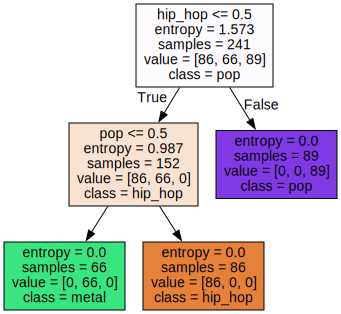

In [80]:
display(SVG(graph.pipe(format='svg')))

In [71]:
clf.score(X_train, y_train)

1.0

In [72]:
clf.score(X_test, y_test)

1.0

**Оценив результаты тренировчных и тестовых данных и получив score = 1 это говорит нам о том, что наша модель пердоставляет максимально точные данные.**

In [65]:
predictions = clf.predict(X_test)

**Создадим отдельный набор данных в котором отдельно подсчитаем количество песен разными исполителсями.**

In [67]:
blind_guardian = 0
gangstarr = 0
abba = 0 

for artists in predictions:
    if artists == 'blind-guardian':
        blind_guardian += 1
    elif artists == 'gangstarr':
        gangstarr += 1
    elif artists == 'abba':
        abba += 1    
prediction = pd.DataFrame({'blind-guardian': [blind_guardian],
                          'gangstarr': [gangstarr],
                          'abba': [abba]})
print(prediction)                      

   blind-guardian  gangstarr  abba
0              43         36    40


In [68]:
precision = precision_score(y_test, predictions, average='micro')

In [69]:
precision

1.0